# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
import os
import glob
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq "/content/drive/MyDrive/CNN/animals10.zip"

In [4]:
butterfly = sorted(glob.glob('./Animals-10/butterfly/*'))
cat = sorted(glob.glob('./Animals-10/cat/*'))
chicken = sorted(glob.glob('./Animals-10/chicken/*'))
cow = sorted(glob.glob('./Animals-10/cow/*'))
dog = sorted(glob.glob('./Animals-10/dog/*'))
elephant = sorted(glob.glob('./Animals-10/elephant/*'))
horse = sorted(glob.glob('./Animals-10/horse/*'))
sheep = sorted(glob.glob('./Animals-10/sheep/*'))
spider = sorted(glob.glob('./Animals-10/spider/*'))
squirrel = sorted(glob.glob('./Animals-10/squirrel/*'))

print(len(butterfly))
print(len(cat))
print(len(chicken))
print(len(cow))
print(len(dog))
print(len(elephant))
print(len(horse))
print(len(sheep))
print(len(spider))
print(len(squirrel))

2112
1668
3098
1866
4863
1446
2623
1820
4821
1862


In [5]:
# test에 넣을 이미지 개수 계산
animals=[butterfly,cat,chicken,cow,dog,elephant,horse,sheep,spider,squirrel]
animals_test_count=[]

def test_count(animal):
  count=round(len(animal)*0.3)
  animals_test_count.append(count)

for animal in animals:
  test_count(animal)
animals_test_count

[634, 500, 929, 560, 1459, 434, 787, 546, 1446, 559]

In [6]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [7]:
# train, test 폴더 경로 선언 & 만들기
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
animals_string=['butterfly','cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']

def make_folder(index, animal):
  train_path='./train/%s'%animal
  test_path='./test/%s'% animal
  os.makedirs(train_path,exist_ok=True)
  os.makedirs(test_path,exist_ok=True)
  print('[',animal,']')
  split(animals[index],animals_test_count[index],train_path,test_path)
  

for index,animal in enumerate(animals_string):
  make_folder(index, animal)

[ butterfly ]
train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
[ cat ]
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
[ chicken ]
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
[ cow ]
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
[ dog ]
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
[ elephant ]
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
[ horse ]
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
[ sheep ]
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
[ spider ]
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
[ squirrel ]
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

(225, 300, 3)


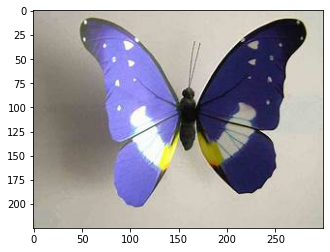

In [8]:
#이미지 사이즈 확인
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

img=Image.open(butterfly[0])
img_np=np.array(img)
imshow(img_np)
print(img_np.shape)

In [10]:
import torchvision.transforms as transforms
transform_train= transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
transform_test= transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

(224, 224, 3)


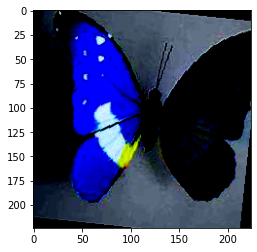

In [11]:
img_augmented=transform_train(img)
img_augmented_np=np.array(img_augmented)
img_augmented_tr=img_augmented_np.transpose(1,2,0)
imshow(img_augmented_tr)
print(img_augmented_tr.shape)

In [12]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
import torchvision
import torch
train_data=torchvision.datasets.ImageFolder(
    root='./train',
    transform=transform_train
)
test_data=torchvision.datasets.ImageFolder(
    root='./test',
    transform=transform_test
)

In [13]:
print(len(train_data))
print(len(test_data))
print(train_data[0][0].shape)
print(train_data[0][1])

18325
7854
torch.Size([3, 224, 224])
0


In [14]:
# train, test에 대해 DataLoader 정의
trainloader=torch.utils.data.DataLoader(
    train_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

testloader=torch.utils.data.DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

In [15]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?
import torch.nn as nn
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.layer=nn.Sequential(
       nn.Conv2d(3,16,kernel_size=3,padding=1),   #(32,3,224,224)->(32,16,224,224)
       nn.ReLU(),
       nn.MaxPool2d(2,2),                         #(32,16,112,112)
       nn.Conv2d(16,32,kernel_size=3,padding=1),  #(32,32,112,112)
       nn.ReLU(),
       nn.Dropout(0.2),
       nn.MaxPool2d(2,2),                         #(32,32,56,56)
       nn.Conv2d(32,32,kernel_size=3,padding=1),  #(32,32,56,56)
       nn.ReLU(),
       nn.Dropout(0.2),
       nn.MaxPool2d(2,2),                         #(32,32,28,28),
       nn.Conv2d(32,32,kernel_size=3,padding=1),  #(32,32,28,28)
       nn.ReLU(),
       nn.Dropout(0.2),
       nn.MaxPool2d(2,2),                         #(32,32,14,14)
       nn.Conv2d(32,32,kernel_size=3,padding=1),  #(32,32,14,14)
       nn.ReLU(),
       nn.Dropout(0.2),
       nn.MaxPool2d(2,2),                         #(32,32,7,7)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(32*7*7,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )
  def forward(self,x):
    out=self.layer(x)
    out=out.view(out.size(0),-1)
    out=self.fc_layer(out)
    return out

In [16]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
from torchsummary import summary
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
 # 모델 객체 선언
mymodel = MyModel().to(device)
summary(mymodel, (3,224,224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 224, 224]             448
              ReLU-2         [32, 16, 224, 224]               0
         MaxPool2d-3         [32, 16, 112, 112]               0
            Conv2d-4         [32, 32, 112, 112]           4,640
              ReLU-5         [32, 32, 112, 112]               0
           Dropout-6         [32, 32, 112, 112]               0
         MaxPool2d-7           [32, 32, 56, 56]               0
            Conv2d-8           [32, 32, 56, 56]           9,248
              ReLU-9           [32, 32, 56, 56]               0
          Dropout-10           [32, 32, 56, 56]               0
        MaxPool2d-11           [32, 32, 28, 28]               0
           Conv2d-12           [32, 32, 28, 28]           9,248
             ReLU-13           [32, 32, 28, 28]               0
          Dropout-14           [32, 32,

In [17]:
device

device(type='cuda', index=0)

In [18]:
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Dropout(p=0.2, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Dropout(p=0.2, inplace=False)
    (18): MaxP

In [19]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001,weight_decay=0.0001)

In [20]:
seq_train_loss=[]
seq_test_loss=[]
seq_train_acc=[]
seq_test_acc=[]

In [21]:
# train 함수 정의
def train(epoch):
  print(f'\n[ Train epoch: {epoch+1} ]')
  mymodel.train()

  batch_losses=[]
  total=0
  correct=0
  for batch_idx, (inputs, targets) in enumerate(trainloader):
    inputs, targets=inputs.to(device), targets.to(device)

    optimizer.zero_grad()
    outputs=mymodel(inputs)
    loss=criterion(outputs,targets)
    loss.backward()
    optimizer.step()

    total+=targets.size(0)
    batch_losses.append(loss.item())
    _, predicted=outputs.max(1)
    correct+=(predicted==targets).sum().item()
  
  avg_loss=sum(batch_losses)/len(batch_losses)
  seq_train_loss.append(avg_loss)
  seq_train_acc.append(100*correct/total)
  print('total train accuracy:',100*correct/total)
  print('total train loss:',avg_loss)

In [22]:
# test 함수 정의
def test(epoch):
  print(f'\n[ Test epoch: {epoch+1} ]')
  mymodel.eval()

  batch_losses=[]
  correct=0
  total=0

  with torch.no_grad():
    for batch_idx, (inputs,targets) in enumerate(testloader):
      inputs,targets=inputs.to(device),targets.to(device)

      outputs=mymodel(inputs)
      loss=criterion(outputs,targets)

      batch_losses.append(loss.item())
      total+=targets.size(0)
      _, predicted=outputs.max(1)
      correct+=(predicted==targets).sum().item()

  avg_loss=sum(batch_losses)/len(batch_losses)
  seq_test_loss.append(avg_loss)
  seq_test_acc.append(100*correct/total)
  print('test accuracy:',100*correct/total)
  print('test loss:',avg_loss)

In [23]:
# training
num_epoch=30
for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)


[ Train epoch: 1 ]
total train accuracy: 29.959072305593452
total train loss: 1.9833720387796665

[ Test epoch: 1 ]
test accuracy: 38.79551820728291
test loss: 1.8304036850851726

[ Train epoch: 2 ]
total train accuracy: 45.113233287858115
total train loss: 1.5975197451693017

[ Test epoch: 2 ]
test accuracy: 50.03819709702063
test loss: 1.5451397428183051

[ Train epoch: 3 ]
total train accuracy: 52.15279672578445
total train loss: 1.4074710606488465

[ Test epoch: 3 ]
test accuracy: 54.67277820218997
test loss: 1.4373154555394398

[ Train epoch: 4 ]
total train accuracy: 55.656207366984994
total train loss: 1.2957674151523784

[ Test epoch: 4 ]
test accuracy: 57.74127832951363
test loss: 1.335862003448533

[ Train epoch: 5 ]
total train accuracy: 58.493860845839016
total train loss: 1.2067578559770633

[ Test epoch: 5 ]
test accuracy: 57.384772090654444
test loss: 1.2690936850338448

[ Train epoch: 6 ]
total train accuracy: 61.86630286493861
total train loss: 1.1318415485543523

[ T

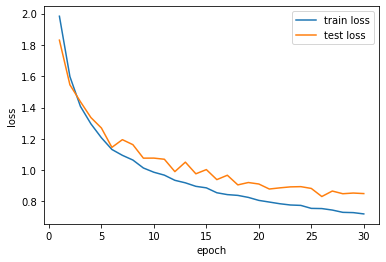

In [25]:
# loss, accuracy 추이 확인 with plt.plot
plt.plot(range(1,31),seq_train_loss,label='train loss')
plt.plot(range(1,31),seq_test_loss,label='test loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


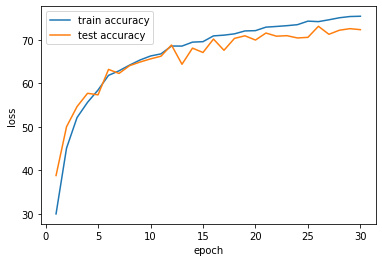

In [26]:
plt.plot(range(1,31),seq_train_acc,label='train accuracy')
plt.plot(range(1,31),seq_test_acc,label='test accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()